# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [20]:
import numpy as np
np.random.seed(42) # For reproducibility

#initializes a neural netowrk with given input size, hidden layers and output size. 
#each layer has randomly initialized weights and biases 
def initialize_network(input_size, hidden_layers, output_size):
    network = []

    #define the layer sizes including input, hidden and output layers
    layer_sizes = [input_size] + hidden_layers + [output_size]

    #initialize weights and biases for each layer 
    for i in range(len(layer_sizes) -1): 
        layer = {
            'weights': np.random.randn(layer_sizes[i], layer_sizes[i+1]), #random weights 
            'biases': np.random.randn(layer_sizes[i+1]) #random biases 
        }
        network.append(layer)

    return network; 
    
# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1)
print("Rocio + Initialized Network:", network)

Rocio + Initialized Network: [{'weights': array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975]]), 'biases': array([ 0.24196227, -1.91328024, -1.72491783, -0.56228753])}, {'weights': array([[-1.01283112,  0.31424733, -0.90802408],
       [-1.4123037 ,  1.46564877, -0.2257763 ],
       [ 0.0675282 , -1.42474819, -0.54438272],
       [ 0.11092259, -1.15099358,  0.37569802]]), 'biases': array([-0.60063869, -0.29169375, -0.60170661])}, {'weights': array([[ 1.85227818],
       [-0.01349722],
       [-1.05771093]]), 'biases': array([0.82254491])}]


## Step 2: Compute Weighted Sum

In [21]:

#computes the weighted sum of inputs for a given layer using NumPys dot product 
def compute_weighted_sum(inputs, weights, biases):
    # Please numpy dot to calcuate the compute weighted with linear 
    return np.dot(inputs, weights) + biases
    
#initialize a network with 3 inputs, 2 hiddden layers (4 and 3 nodes) and 1 output node 
network = initialize_network(3,[4,3], 1)

# Test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]])
layer = network[0]  # First layer
Z = compute_weighted_sum(inputs, layer['weights'], layer['biases'])
print("Rocio + Weighted Sum:", Z)

Rocio + Weighted Sum: [[ 0.45596228  0.4478912  -2.78058598 -0.40920259]]


## Step 3: Compute Node Activation

In [22]:
#applies the sigmoid activation function element-wise
def sigmoid(Z):
    # returns ndarrays: sigmoid activation values 
    return 1/(1+np.exp(-Z))

#computes the derivative of the sigmoid function 
def sigmoid_derivative(A):
    #return ndarray: derivative of the sigmoid function 
    return A * (1-A)
#initializes a network with 3 inputs, 2 hidden layers (4 and 3 nodes) and 1 output node 
network = initialize_network(3,[4,3], 1)

#test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]]) 
layer = network[0] #first layer 
Z = compute_weighted_sum(inputs, layer['weights'], layer['biases'])

# Compute activation for the weighted sum
A = sigmoid(Z)
print("Rocio:", A)

Rocio: [[0.7583801  0.55388286 0.30344119 0.56376947]]


## Step 4: Perform Forward Propagation

In [25]:
#performs forwards propagation through the network 
def forward_propagation(inputs, network):
    # provide your code
    activations = [inputs] #store the input layer activations

    for layer in network:
        Z = compute_weighted_sum(activations[-1], layer['weights'], layer['biases'])
        A = sigmoid(Z)
        activations.append(A)

    return activations

#initializa a network with 3 inputs, 2 hidden layers (and 3 nodes) and 1 output node
network = initialize_network(3,[4,3],1)

# Perform forward propagation
inputs = np.array([[0.5,0.2,0.1]])
activations = forward_propagation(inputs, network)
print(activations)
print("Rocio + Final Output:", activations[-1])

[array([[0.5, 0.2, 0.1]]), array([[0.32405081, 0.84329152, 0.70351111, 0.71674691]]), array([[0.3023708 , 0.81781197, 0.29833249]]), array([[0.18416435]])]
myName + Final Output: [[0.18416435]]


## Step 5: Backpropagation

In [27]:
#performs backpropagation to compute gradients for weight and bias updates 
def backpropagation(network, activations, y_true):
    gradients = []
    L = len(network) #number of layers

    #compute error for the output layer 
    error = activations[-1] - y_true

    for i in reversed(range(L)):
        A = activations[i] #activation of previous layer 
        dZ = error * sigmoid_derivative(activations[i+1]) #gradient of loss w.r.
        dW = np.dot(A.T, dZ) #gradient of loss w.r.t weights 
        dB = np.sum(dZ, axis=0, keepdims=True) #gradient of loss w.r.t biases 

        gradients.insert(0, {'dW': dW, 'dB' : dB})

        #propagate the error backwards
        error = np.dot(dZ, network[i]['weights'].T)
    return gradients

#initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output 
network = initialize_network(3,[4,3],1)

#test forward propagations 
inputs = np.array([[0.5,0.2,0.1]]) #example target output 
activations = forward_propagation(inputs, network)

# Compute gradients
y_true = np.array([[1]])  # Example target output
gradients = backpropagation(network, activations, y_true)
print("Rocio + Gradients:", gradients)

<Your Name > + Gradients: [{'dW': array([[ 5.51911733e-03,  2.96752583e-05,  7.77662965e-04,
        -1.42710560e-03],
       [ 2.20764693e-03,  1.18701033e-05,  3.11065186e-04,
        -5.70842238e-04],
       [ 1.10382347e-03,  5.93505166e-06,  1.55532593e-04,
        -2.85421119e-04]]), 'dB': array([[ 1.10382347e-02,  5.93505166e-05,  1.55532593e-03,
        -2.85421119e-03]])}, {'dW': array([[ 0.00659422,  0.00068086, -0.00450411],
       [ 0.01271057,  0.00131238, -0.0086818 ],
       [ 0.00553726,  0.00057173, -0.00378216],
       [ 0.00510368,  0.00052696, -0.00348601]]), 'dB': array([[ 0.01706217,  0.00176168, -0.01165411]])}, {'dW': array([[-0.11135717],
       [-0.02897   ],
       [-0.07254042]]), 'dB': array([[-0.13710789]])}]


## Step 6: Update Weights

In [32]:
#updates the network weights and biases using computed gradients 
def update_weights(network, gradients, learning_rate):
    # Hints: weights -= learning_rate * 'dW'
    # Hints: biases -= learning_rate * 'db'
    for i in range(len(network)):
        network[i]['weights'] -= learning_rate * gradients[i]['dW']
        network[i]['biases'] -= learning_rate * gradients[i]['dB'].reshape(network[i]['biases'].shape)
#initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes) and 1 output node
network = initialize_network(3,[4,3],1)

#test forward propagation 
inputs = np.array([[0.5, 0.2, 0.1]])
activations = forward_propagation(inputs, network)

#compute gradients 
y_true = np.array([[1]]) #example target output 
gradients = backpropagation(network, activations, y_true)

# Update weights with a learning rate of 0.1
update_weights(network, gradients, learning_rate=0.1)
print("Rocio + Updated Network:", network)

Rocio + Updated Network: [{'weights': array([[-0.33445674, -0.47491333, -0.65343088,  1.76561736],
       [ 0.40499951, -1.26087116,  0.91782129,  2.12222144],
       [ 1.03247416, -1.51936357, -0.4842544 ,  1.26694377]]), 'biases': array([-0.70758047,  0.4438834 ,  0.77443075, -0.92660423])}, {'weights': array([[-0.0592968 , -3.24132637, -1.02434456],
       [-0.25225961, -1.24786287,  1.63246947],
       [-1.42970205, -0.44015796,  0.13082339],
       [ 1.4417005 , -1.4359725 ,  1.16324429]]), 'biases': array([ 0.01091761, -0.98168546,  0.46223252])}, {'weights': array([[ 0.20548272],
       [-0.59991574],
       [ 0.08142877]]), 'biases': array([-0.37148869])}]


## Step 7: Visualizing Loss Changes

In [40]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    return np.mean((y_true-y_pred) ** 2)


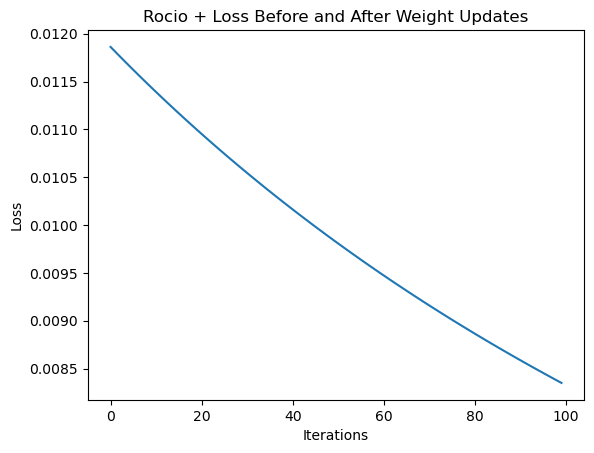

In [51]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([[1]])
learning_rate = 0.1

#pick a weight 
tracked_weight_index =(0,0)
tracked_weight_changes=[]

for iteration in range(100):
    # provide your code
    # Hints: forward_propagation function with inputs network
    #        compute_loss for y_true and activations[-1]
    #        add loss to losses
    activations = forward_propagation(inputs, network)
    loss = compute_loss(y_true, activations[-1])
    losses.append(loss)
    # gradients = backpropagation function
    gradients = backpropagation(network, activations, y_true)

    # Track changes of the selected weight
    tracked_weight_changes.append(network[0]['weights'][tracked_weight_index])
    # update_weights
    update_weights(network, gradients, learning_rate)
    
    
    
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("Rocio + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.

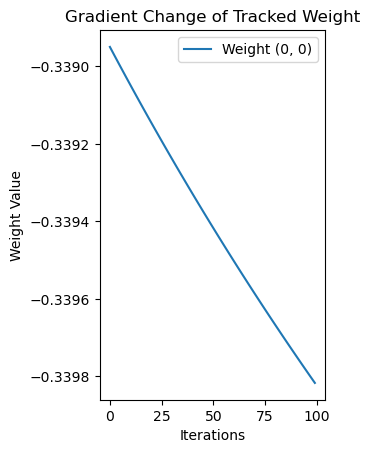

In [52]:


plt.subplot(1,2,2)
plt.plot(tracked_weight_changes, label=f"Weight {tracked_weight_index}")
plt.title("Gradient Change of Tracked Weight")
plt.xlabel("Iterations")
plt.ylabel("Weight Value")
plt.legend()
plt.show()